## import dependencies

In [7]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.components import FlowAccumulator
from landlab.components import DepressionFinderAndRouter
from landlab.components import ErosionDeposition
from landlab.components import FastscapeEroder
from landlab.io import read_esri_ascii
from landlab.io.esri_ascii import write_esri_ascii

## import DEM

In [8]:
(mg_origin, z) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")

(mg, z) = read_esri_ascii("./save_asc/testes_fse_7_8/ascii_fse_10_topographic__elevation.asc", name="topographic__elevation")
mg.at_node.keys()

['topographic__elevation']

### show DEM

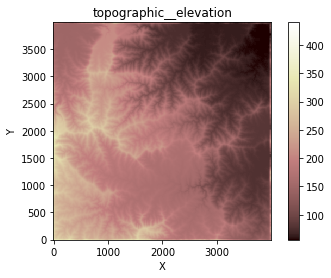

In [9]:
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

## create components

In [10]:
fr = FlowAccumulator(mg, flow_director='D8')
df = DepressionFinderAndRouter(mg)
fsc = FastscapeEroder(
     mg,
     K_sp=.001,
     m_sp=.5,
     n_sp=1)

ed = ErosionDeposition(
     mg,
     K=0.00004, # Erodibility for substrate (units vary). talvez a mesma do fast scape (valor anterior = 0.00001)
     v_s=0.001, # Effective settling velocity for chosen grain size metric [L/T].
     m_sp=0.4, # Discharge exponent (units vary) usar valores do fast scape (valor anterior = 0.5)
     n_sp = 1.0, #Slope exponent (units vary) usar valores do fast scape
     sp_crit=0) #Critical stream power to erode substrate [E/(TL^2)] usar valores do fast scape

## run components 
> Burn in an initial drainage network using the Fastscape eroder:



In [11]:
mg.at_node['topographic__elevation'][0]

400.0

In [1]:
# Valor do fsc_dt deve ser entre 10y e 1000y 
fsc_dt= 1000 #passo de tempo do fast scape
ed_dt=1000 #Erosion deposition time step

for i in range(31):
    print(i)
    fr.run_one_step()
    df.map_depressions()
    flooded = np.where(df.flood_status==3)[0] # ver pra que serve
    fsc.run_one_step(dt = fsc_dt)
    mg.at_node['topographic__elevation'][0] -= 0.0 #uplift (nao sei pq ta fazendo isso, talvez nao precise) valor inicial era 0.001
   
    #parte abaixo eh do erosion deposision
    ed.run_one_step(dt = ed_dt)
    mg.at_node['topographic__elevation'][0] -= 2e-4 * ed_dt # Verificar se faz diferenca
    if i == 10 or i == 20 or i == 30:
        files = write_esri_ascii("./save_asc/testes_fse_ed_7_8/ascii_fse_intercalado"+str(i)+".asc", mg)
        


0


NameError: name 'fr' is not defined

In [13]:
mg.at_node.keys()

['topographic__elevation',
 'water__unit_flux_in',
 'flow__sink_flag',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'depression__depth',
 'depression__outlet_node',
 'is_pit',
 'flood_status_code',
 'sediment__flux']

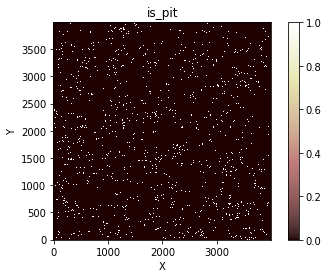

In [14]:
landlab.plot.imshow.imshow_grid_at_node(mg,'is_pit')

## mAKE  Copy

In [ ]:
# mg2 = mg

## create E/D component
> Instantiate the E/D component:

In [ ]:
#ed = ErosionDeposition(
#     mg2,
#     K=0.00004, # Erodibility for substrate (units vary). talvez a mesma do fast scape (valor anterior = 0.00001)
#     v_s=0.001, # Effective settling velocity for chosen grain size metric [L/T].
#     m_sp=0.4, # Discharge exponent (units vary) usar valores do fast scape (valor anterior = 0.5)
#     n_sp = 1.0, #Slope exponent (units vary) usar valores do fast scape
#     sp_crit=0) #Critical stream power to erode substrate [E/(TL^2)] usar valores do fast scape

## run E/D component

In [ ]:
#ed_dt=1000 #Erosion deposition time step

#for i in range(40): #E/D component loop
#    print(i)
#    fr.run_one_step()
#    df.map_depressions()
#    ed.run_one_step(dt = ed_dt)
#    mg.at_node['topographic__elevation'][0] -= 2e-4 * ed_dt # Verificar se faz diferenca
#    if i == 10 or i == 20 or i == 30:
#        files = write_esri_ascii("./save_asc/testes_ed_7_8/ascii_fse_"+str(i)+".asc", mg)


In [ ]:
landlab.plot.imshow.imshow_grid_at_node(mg2,'topographic__elevation')

In [ ]:
landlab.plot.imshow.imshow_grid_at_node(mg,'topographic__elevation')

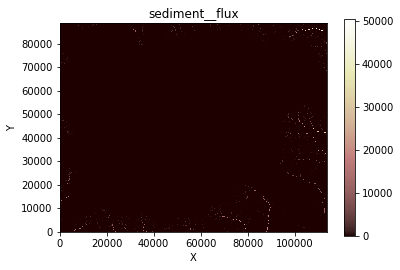

In [17]:
landlab.plot.imshow.imshow_grid_at_node(mg2,'sediment__flux')